In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math
file_path = 'data/uscities.csv'
df = pd.read_csv(file_path)

df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440


In [2]:
df_sorted = df.sort_values(by='population', ascending=False)
top_200_cities = df_sorted.head(200)

top_200_cities.head()


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440


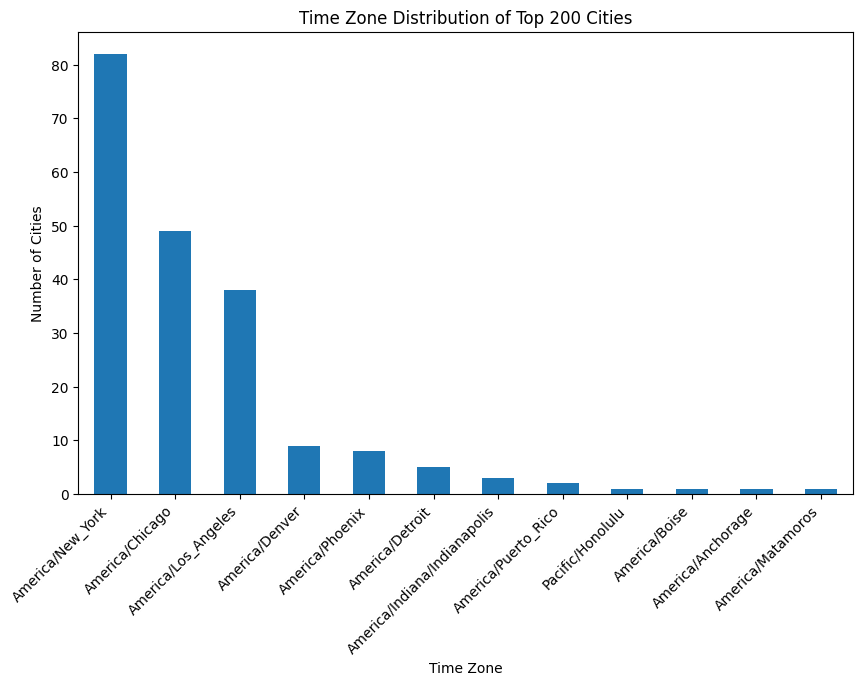

In [3]:
time_zone_counts = top_200_cities['timezone'].value_counts()
time_zone_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Time Zone Distribution of Top 200 Cities')
plt.xlabel('Time Zone')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45, ha='right')

plt.show()

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities_gdf = gpd.GeoDataFrame(top_200_cities, geometry=gpd.points_from_xy(top_200_cities.lng, top_200_cities.lat))


C:\Users\Benja\AppData\Local\Temp\ipykernel_32776\1549822560.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Top 200 Cities in the US by population')

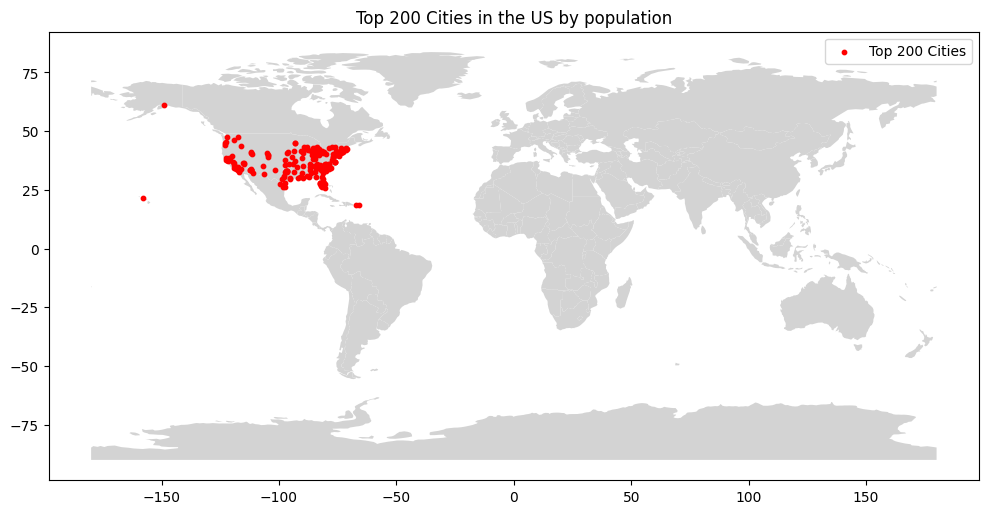

In [5]:
ax = world.plot(figsize=(12, 8), color='lightgrey')
cities_gdf.plot(ax=ax, color='red', markersize=10, label='Top 200 Cities')
plt.legend()

plt.title('Top 200 Cities in the US by population')

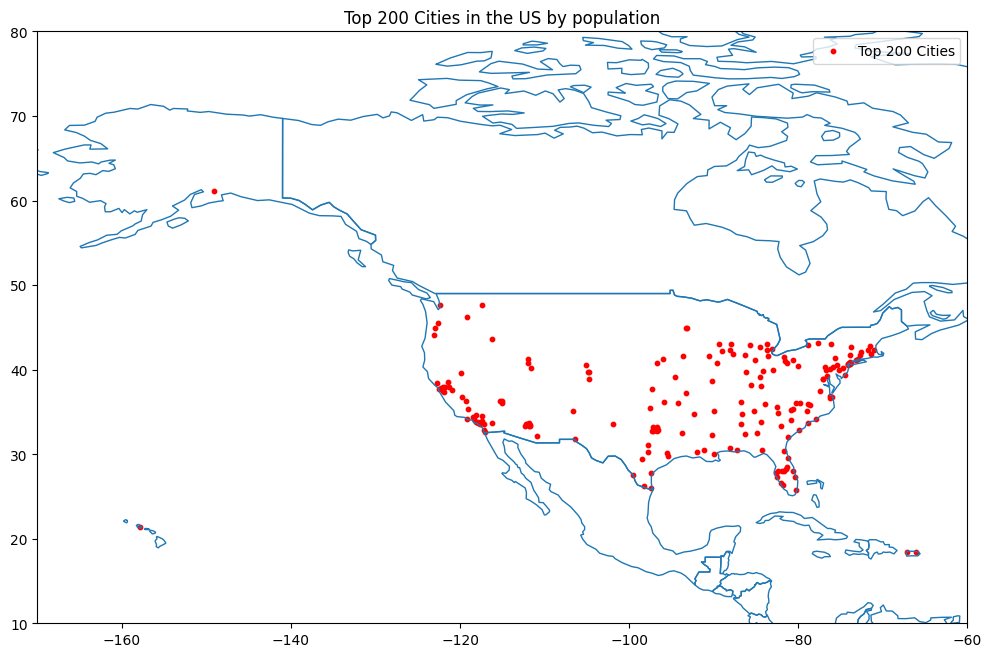

In [6]:
bbox = [-170, 10, -60, 80]  # (min_lon, min_lat, max_lon, max_lat)
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
cities_gdf.plot(ax=ax, color='red', markersize=10, label='Top 200 Cities')

# Set the extent of the map to North America
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Add a legend
plt.legend()

# Set title
plt.title('Top 200 Cities in the US by population')

# Show the map
plt.show()

In [7]:
top_200_cities[top_200_cities['city']=='New York']

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016


In [8]:
x = 'Los Angeles'

top_200_cities[top_200_cities['city']==x]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491


In [11]:
# distance calculator

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points in 
    latitude and longitude in miles.
    """
    earth_radius = 3958.8

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance
    distance = earth_radius * c

    return distance

In [32]:
def guess_city(answer, guess):

    answer_lat = top_200_cities[top_200_cities['city']==answer]['lat'].iloc[0]
    answer_lon = top_200_cities[top_200_cities['city']==answer]['lng'].iloc[0]
    guess_lat = top_200_cities[top_200_cities['city']==guess]['lat'].iloc[0]
    guess_lon = top_200_cities[top_200_cities['city']==guess]['lng'].iloc[0]

    distance = distance = haversine_distance(answer_lat, answer_lon, guess_lat, guess_lon)
    print(guess + ' is ' + str(distance) + ' miles away from ' + answer)

In [33]:
guess_city('Boston','Chicago')

Chicago is 850.6815968748833 miles away from Boston


In [34]:
def guess_city_map(answer, guess):


    answer_lat = top_200_cities[top_200_cities['city']==answer]['lat'].iloc[0]
    answer_lon = top_200_cities[top_200_cities['city']==answer]['lng'].iloc[0]
    guess_lat = top_200_cities[top_200_cities['city']==guess]['lat'].iloc[0]
    guess_lon = top_200_cities[top_200_cities['city']==guess]['lng'].iloc[0]

    cities_data = [
        {'city':answer,'lat':answer_lat,'lon':answer_lon},
        {'city':guess,'lat':guess_lat,'lon':guess_lon}
    ]

    results_df = pd.DataFrame(cities_data)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    results_gdf = gpd.GeoDataFrame(results_df, geometry=gpd.points_from_xy(results_df.lon, results_df.lat))

    bbox = [-170, 10, -60, 80]  # (min_lon, min_lat, max_lon, max_lat)
    fig, ax = plt.subplots(figsize=(12, 8))
    world.boundary.plot(ax=ax, linewidth=1)
    results_gdf.plot(ax=ax, color='red', markersize=10, label='City Guess')

    # Set the extent of the map to North America
    ax.set_xlim(bbox[0], bbox[2])
    ax.set_ylim(bbox[1], bbox[3])

    # Add a legend
    plt.legend()

    # Set title
    plt.title('City Guess')

    # Show the map
    plt.show()

    distance = distance = haversine_distance(answer_lat, answer_lon, guess_lat, guess_lon)

    
    print(guess + ' is ' + str(distance) + ' miles away from ' + answer)

C:\Users\Benja\AppData\Local\Temp\ipykernel_32776\3598481342.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


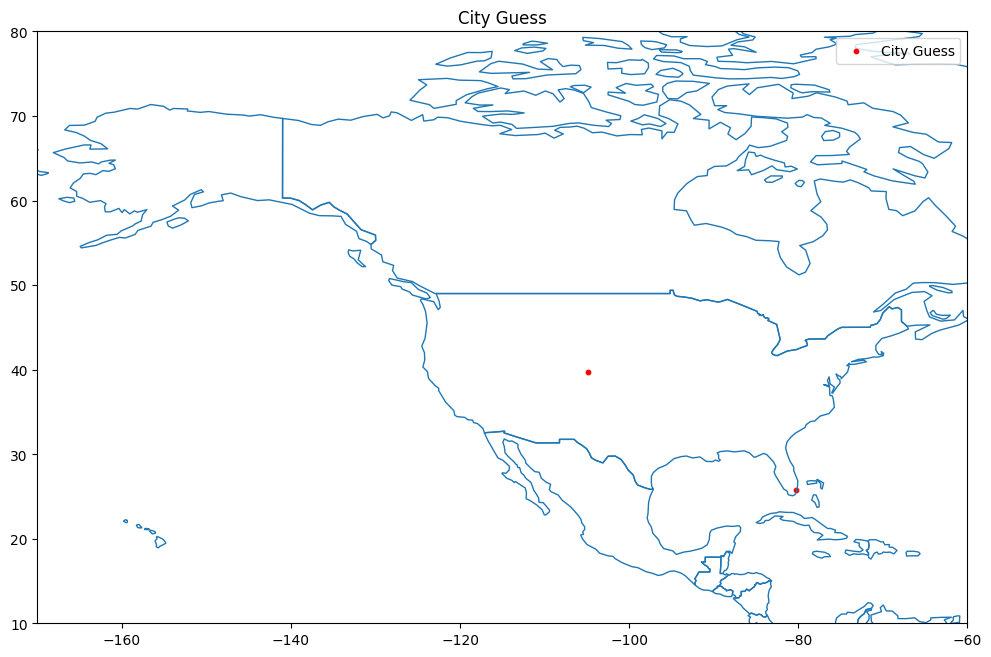

Miami is 1718.66342973763 miles away from Denver


In [35]:
guess_city_map('Denver','Miami')